In [183]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt 
from datetime import datetime

In [184]:
def parser(s):
    return datetime.striptime(s,'%Y-%m')

In [185]:
ice_cream_interest = pd.read_csv('ice_cream_interest.csv',parse_dates=[0],index_col=0,squeeze=True)
ice_cream_interest = ice_cream_interest.asfreq(pd.infer_freq(ice_cream_interest.index))
ice_cream_interest

month
2004-01-01    13
2004-02-01    15
2004-03-01    17
2004-04-01    19
2004-05-01    22
              ..
2020-04-01    55
2020-05-01    71
2020-06-01    81
2020-07-01    90
2020-08-01    76
Freq: MS, Name: interest, Length: 200, dtype: int64

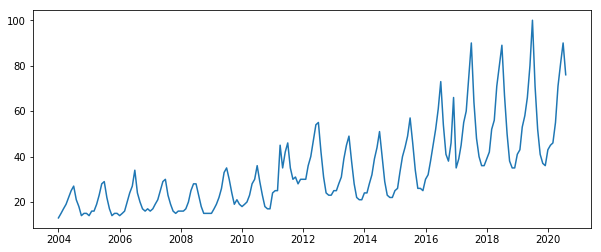

In [186]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)

In [187]:
stl=STL(ice_cream_interest)
result = stl.fit()

In [188]:
seasonal,trend,resid = result.seasonal,result.trend, result.resid

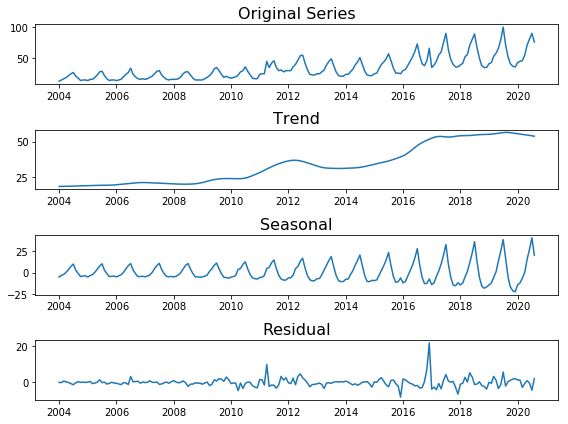

In [189]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(ice_cream_interest)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

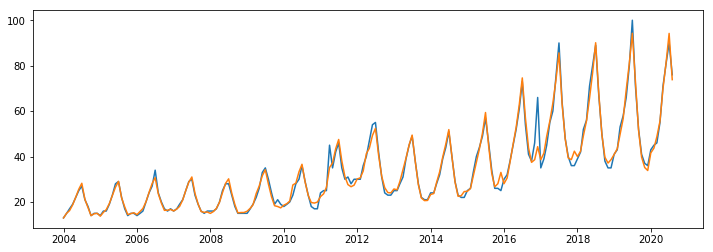

In [190]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

In [191]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 2*resid_dev
upper = resid_mu + 2*resid_dev

(731459.0, 737760.0)

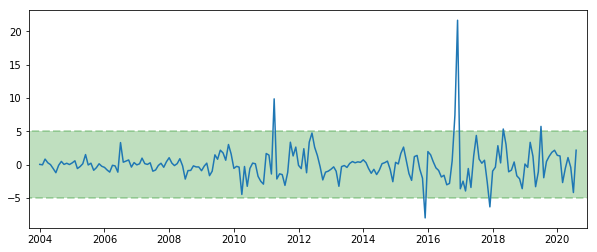

In [192]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2003,1,1), datetime(2021,8,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2003,9,1), datetime(2020,12,1))

In [193]:
anomalies = ice_cream_interest[(resid < lower) | (resid > upper)]

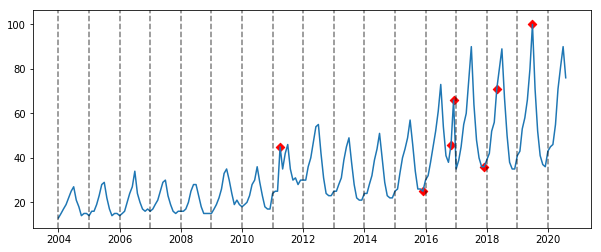

In [194]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index,anomalies, color='r', marker='D')

In [195]:
anomalies

month
2011-04-01     45
2015-12-01     25
2016-11-01     46
2016-12-01     66
2017-12-01     36
2018-05-01     71
2019-07-01    100
Name: interest, dtype: int64

In [196]:
anomalies.index.month[4]
anomalies[anomalies.index.month ==12].index

DatetimeIndex(['2015-12-01', '2016-12-01', '2017-12-01'], dtype='datetime64[ns]', name='month', freq=None)

In [197]:
anomalies[(anomalies.index.month!= anomalies.index.month[0])].mean()

57.333333333333336

In [198]:
anomalies[(anomalies.index.month!= anomalies.index.month[0])]

month
2015-12-01     25
2016-11-01     46
2016-12-01     66
2017-12-01     36
2018-05-01     71
2019-07-01    100
Name: interest, dtype: int64

In [199]:
(25+45+66+36+71+100)/6

57.166666666666664

In [200]:
anomalies[(anomalies.index.month!= anomalies.index.month[3])]

month
2011-04-01     45
2016-11-01     46
2018-05-01     71
2019-07-01    100
Name: interest, dtype: int64

In [201]:
anomalies[(anomalies.index.month!= anomalies.index.month[0])].mean()

57.333333333333336

In [202]:
(45+46+71+100)/4

65.5

In [203]:
anomalies

month
2011-04-01     45
2015-12-01     25
2016-11-01     46
2016-12-01     66
2017-12-01     36
2018-05-01     71
2019-07-01    100
Name: interest, dtype: int64

In [204]:
monthly_data=ice_cream_interest[ice_cream_interest.index.month == 4]
len(monthly_data)

17

In [205]:
new=monthly_data.drop(anomalies[anomalies.index.month == 4].index)
len(new)

16

In [206]:
new.mean()

34.75

In [207]:
ice_cream_interest[anomalies[anomalies.index.month==12].index]

month
2015-12-01    25
2016-12-01    66
2017-12-01    36
Name: interest, dtype: int64

In [208]:
z=[]
def mean(month):
    for values in range (len(month)):
        print(month[values])
        x=ice_cream_interest[ice_cream_interest.index.month == month[values]]
        y=x.drop(anomalies[anomalies.index.month == month[values]].index)
        mean=y.mean()
        ice_cream_interest.loc[anomalies[anomalies.index.month==month[values]].index]=mean
        z.append(mean)
x=anomalies.index.month.values
mean(x)
z

4
12
11
12
12
5
7


[34.75,
 21.615384615384617,
 22.8,
 21.615384615384617,
 21.615384615384617,
 39.125,
 51.1875]

In [209]:
ice_cream_interest[anomalies[anomalies.index.month==12].index]

month
2015-12-01    21.615385
2016-12-01    21.615385
2017-12-01    21.615385
Name: interest, dtype: float64

In [210]:
ice_cream_interest.loc[anomalies[anomalies.index.month==4].index]

month
2011-04-01    34.75
Name: interest, dtype: float64